# Collection of Good graphs for visualisation

In [30]:
#dataframe handling
import pandas as pd


#plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
disease_train = pd.read_csv('disease_train.csv')

# Target Countplot

<AxesSubplot:xlabel='target', ylabel='count'>

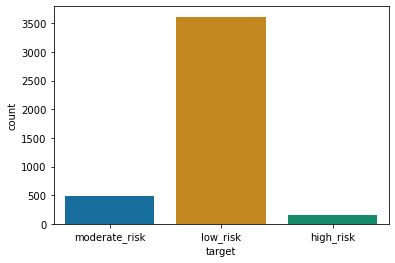

In [32]:
sns.countplot(x= 'target', palette='colorblind', data=disease_train)

# Missing and unique Values

In [33]:
#Categorical
disease_bool = ['sick',            'pregnant',      'concern_type1',   'concern_type2',
                'enlargement',     'tumor'   ,      'disorder',        'medication_A',
                'medication_B',    'mental_health', 'mood_stabiliser', 'surgery',
                'treatment_type1', 'suspect']
disease_cate = ['id', 'gender', 'target']

#Numerical
disease_int  = ['age']
disease_rat  = ['test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5', 'test_X6']

#Grouping the lists, doing it this way can lead to odd orderings but in this case happily it doesn't 
disease_cat = disease_cate + disease_bool
disease_num = disease_int + disease_rat

In [34]:
disease_train['age'].describe()

count     4250.000000
mean        67.374824
std       1004.518821
min          1.000000
25%         37.000000
50%         55.000000
75%         67.000000
max      65526.000000
Name: age, dtype: float64

In [35]:
pd.set_option('display.max_rows', None) #So that the next table isn't truncated

#Gives us a count of the unique values in each cell, this can help identify boolean vs categorical variables
unique_count = disease_train.nunique() 

print(unique_count)

id                 4250
age                  94
gender                2
sick                  2
pregnant              2
test_X1             334
test_X2              77
test_X3             245
test_X4             124
test_X5             263
test_X6              25
concern_type1         2
concern_type2         2
enlargement           2
tumor                 2
disorder              1
medication_A          2
medication_B          2
mental_health         2
mood_stabiliser       2
surgery               2
treatment_type1       2
suspect               2
target                3
dtype: int64


In [36]:
null_count = disease_train.isna().sum() #Creates a count of all the null values in collumns

#We'll use a for loop to pick out the nonzero columns, this is just to display it nicely
for col in disease_train:
    if null_count[col] != 0:
        print(col,' ',null_count[col])

gender   141
test_X1   411
test_X2   1243
test_X3   216
test_X4   392
test_X5   387
test_X6   4096


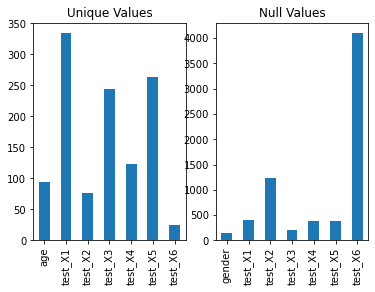

In [37]:
#Remove categoricals for both unique values and null values then plot bargraphs for both side by side
unique_count_num = disease_train[disease_num].nunique()
null_count = null_count[null_count != 0]

plt.subplot(1, 2, 1)
unique_count_num.plot(kind='bar', title = 'Unique Values')

plt.subplot(1, 2, 2)
null_count.plot(kind='bar', title = 'Null Values')

plt.show()

# Boxplots of numericals

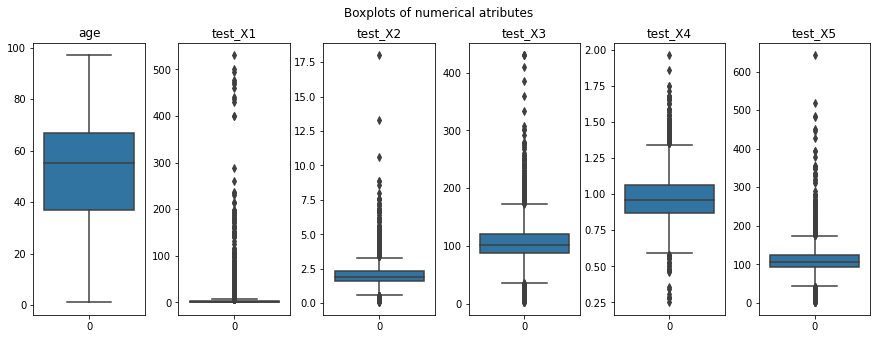

In [38]:
#Let's remove the two outliers
disease_train_agesremoved = disease_train[(disease_train['age'] != 65526) & (disease_train['age'] != 455)] 

fig, (ax) = plt.subplots(1,6, figsize = (15,5))
fig.suptitle('Boxplots of numerical atributes')

numericals_used = [
                 'age', 'test_X1', 'test_X2',
                 'test_X3', 'test_X4', 'test_X5'
                ]

for i in range(len(numericals_used)):
    #print(disease_num[i])
    sns.boxplot(data = disease_train_agesremoved[numericals_used[i]], ax=ax[i])
    ax[i].set_title(numericals_used[i])
    #print(disease_train_agesremoved[numericals_used[i]])
    plt.subplots_adjust(wspace=0.3)

# Density Plots of Numericals vs Risk

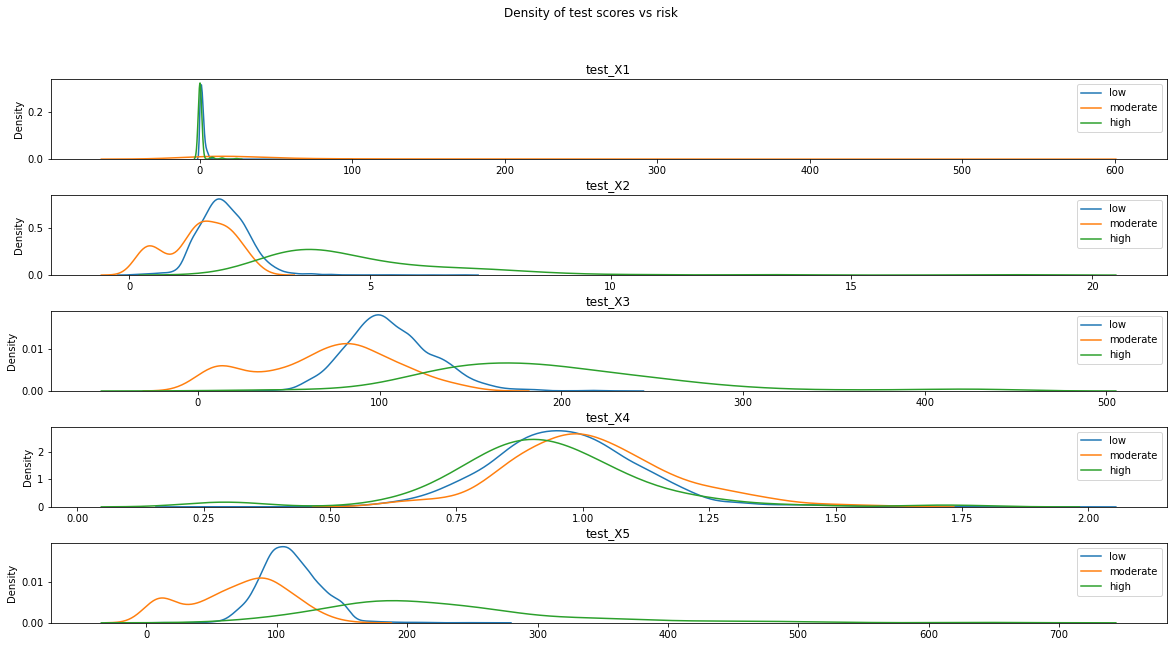

In [39]:
#Split the data by the 3 target types
disease_target_low      = disease_train.loc[(disease_train.target.str.strip() == 'low_risk')]
disease_target_moderate = disease_train.loc[(disease_train.target.str.strip() == 'moderate_risk')]
disease_target_high     = disease_train.loc[(disease_train.target.str.strip() == 'high_risk')]

fig, ax_arr = plt.subplots(5, 1, figsize=(20, 10))
fig.suptitle('Density of test scores vs risk')

for i, ax in enumerate(ax_arr):
    test = 'test_X' + str(i + 1)
    
    sns.kdeplot(data=disease_target_low[test], label='low', palette='colorblind', ax=ax)
    sns.kdeplot(data=disease_target_moderate[test], label='moderate', palette='colorblind', ax=ax)
    sns.kdeplot(data=disease_target_high[test], label='high', palette='colorblind', ax=ax)
    
    plt.subplots_adjust(hspace=0.45)
    
    ax.set_title(test)
    ax.set_xlabel('')
    ax.legend()  # Add legend to each subplot

plt.show()

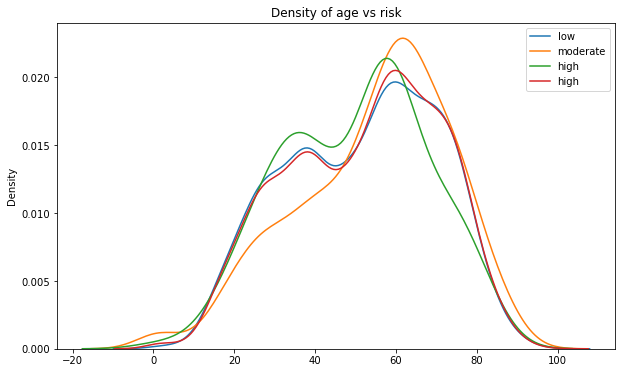

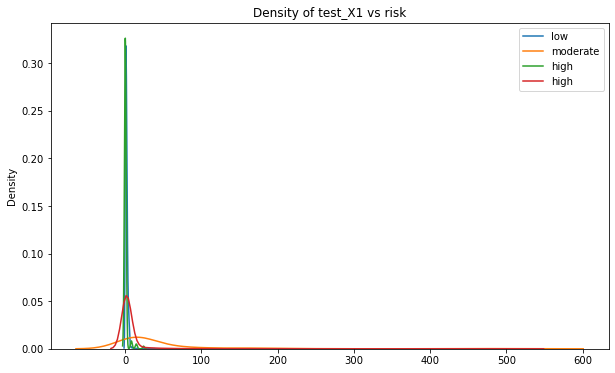

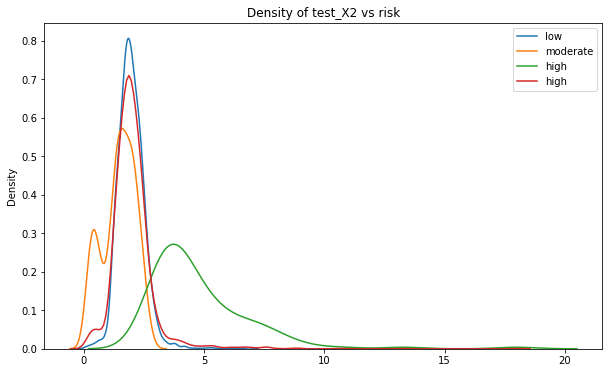

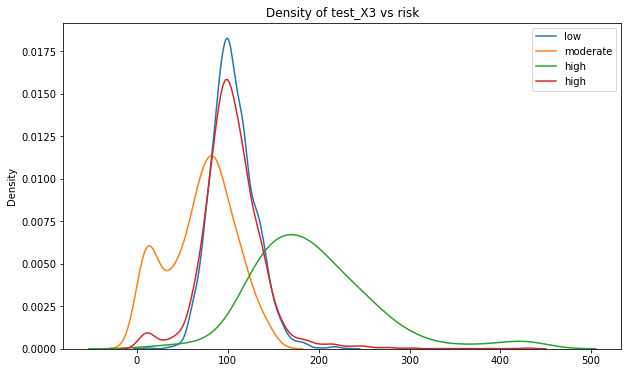

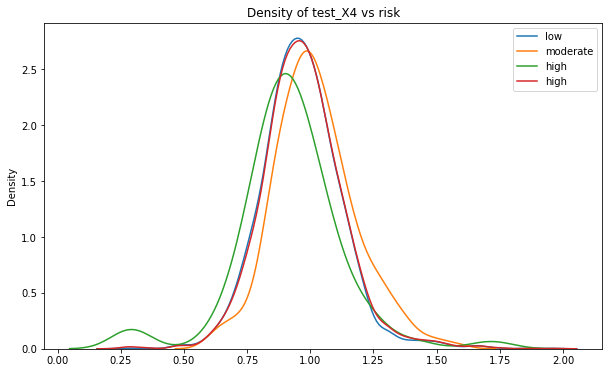

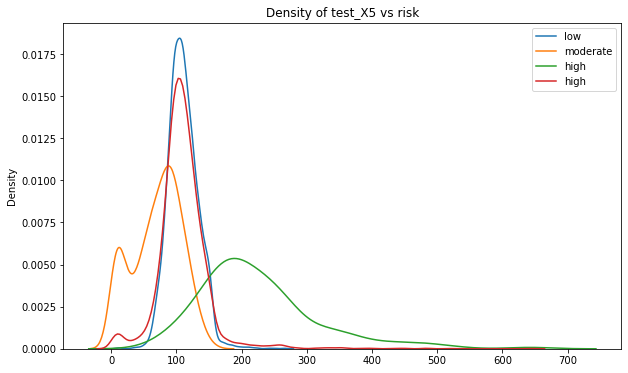

In [61]:
disease_train_agesremoved_low      = disease_train_agesremoved.loc[(disease_train_agesremoved.target.str.strip() == 'low_risk')]
disease_train_agesremoved_moderate = disease_train_agesremoved.loc[(disease_train_agesremoved.target.str.strip() == 'moderate_risk')]
disease_train_agesremoved_high     = disease_train_agesremoved.loc[(disease_train_agesremoved.target.str.strip() == 'high_risk')]

for var in numericals_used:
    plt.figure(figsize=(10, 6))
    
    sns.kdeplot(data=disease_train_agesremoved_low[var], label='low', palette='colorblind')
    sns.kdeplot(data=disease_train_agesremoved_moderate[var], label='moderate', palette='colorblind')
    sns.kdeplot(data=disease_train_agesremoved_high[var], label='high', palette='colorblind')
    sns.kdeplot(data=disease_train_agesremoved[var], label='high', palette='colorblind')

    
    plt.title(f'Density of {var} vs risk')
    plt.xlabel('')  # Remove x-axis label
    plt.legend()  # Add legend to each subplot
    
    plt.show()  # Display the plot

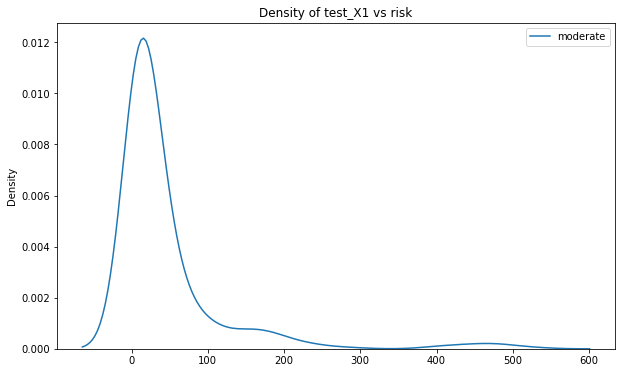

In [53]:
plt.figure(figsize=(10, 6))

#sns.kdeplot(data=disease_train_agesremoved_low['test_X1'], label='low', palette='colorblind')
sns.kdeplot(data=disease_train_agesremoved_moderate['test_X1'], label='moderate', palette='colorblind')
#sns.kdeplot(data=disease_train_agesremoved_high['test_X1'], label='high', palette='colorblind')

plt.title('Density of test_X1 vs risk')
plt.xlabel('')  # Remove x-axis label
plt.legend()  # Add legend to each subplot

plt.show()  # Display the plot

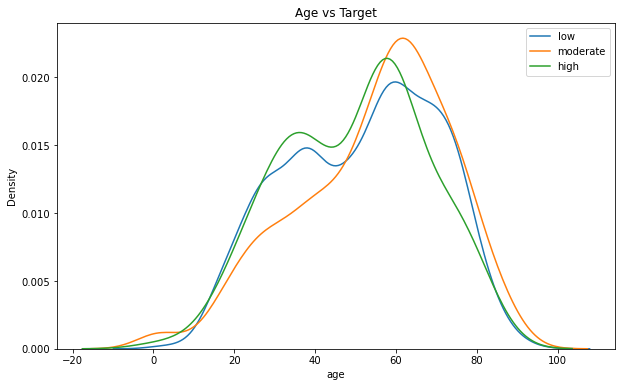

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=disease_train_agesremoved_low['age'], label='low', palette='colorblind', ax=ax)
sns.kdeplot(data=disease_train_agesremoved_moderate['age'], label='moderate', palette='colorblind', ax=ax)
sns.kdeplot(data=disease_train_agesremoved_high['age'], label='high', palette='colorblind', ax=ax)

ax.set_title('Age vs Target')
ax.legend()  # Add legend to each subplot

plt.show()

# Barplots of gender vs risk

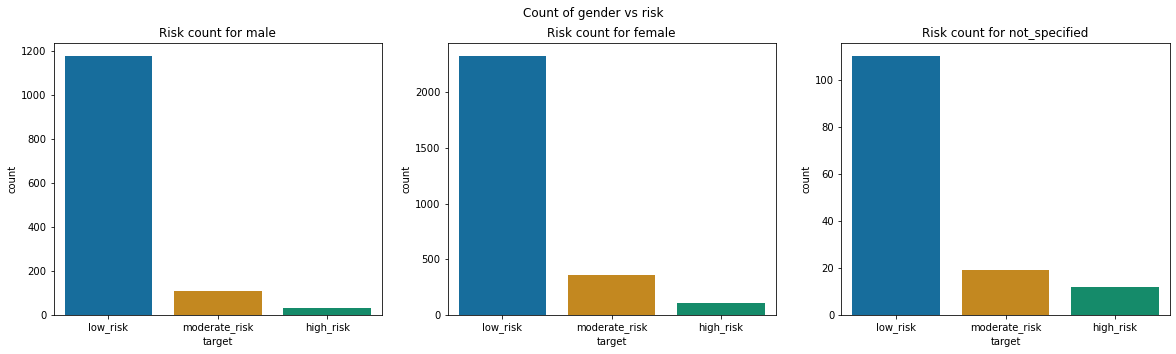

In [11]:
disease_train['gender'] = disease_train['gender'].fillna('not_specified') #let's us include this in the plot

#To help visualise we split the graphs by gender

fig, ax_arr = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Count of gender vs risk')

gender = ['male','female','not_specified']
target_order = ['low_risk','moderate_risk','high_risk']

for i, ax in enumerate(ax_arr):
    test = gender[i]
    temp = disease_train[disease_train['gender'] == test]
    
    sns.countplot(x='target', palette='colorblind', data=temp, order=target_order,  ax=ax)
    
    test = 'Risk count for ' + test
    ax.set_title(test)
    
plt.subplots_adjust(hspace=1)
plt.show()

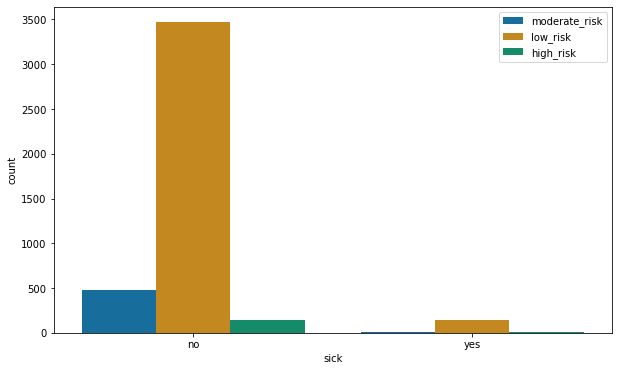

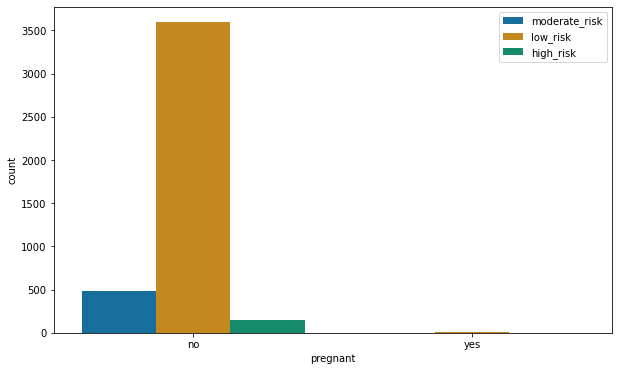

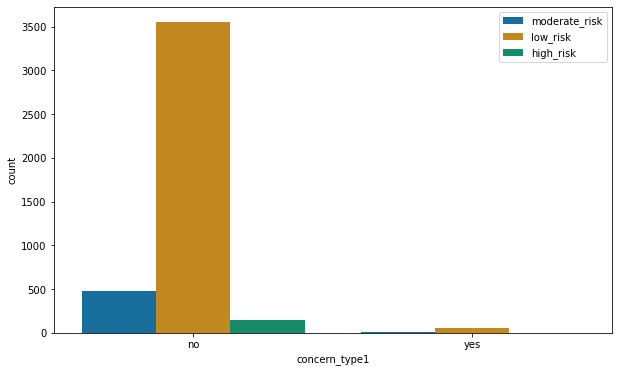

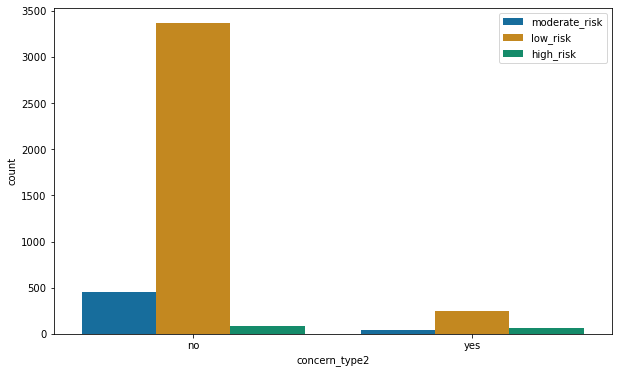

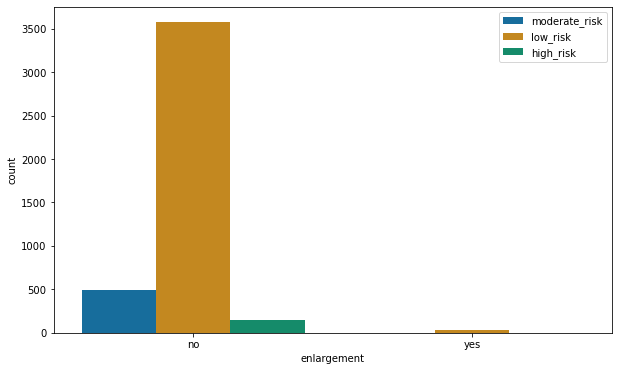

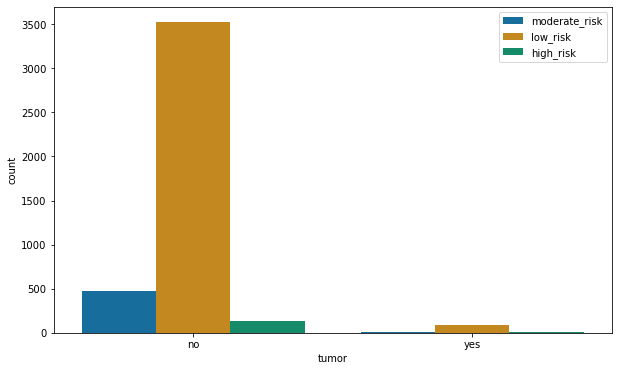

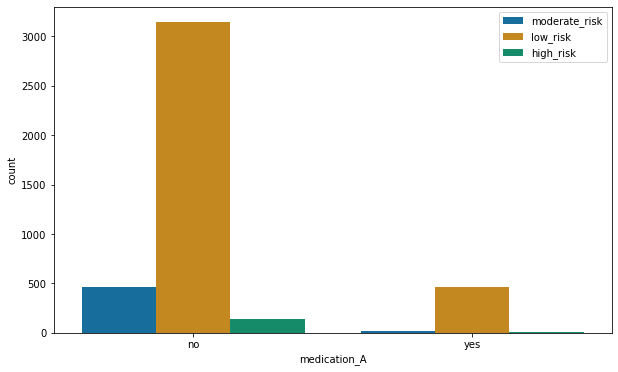

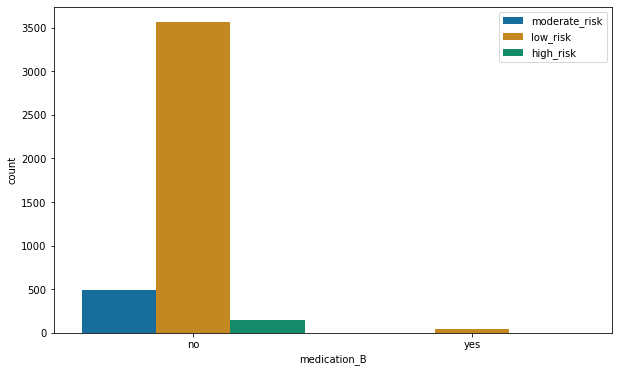

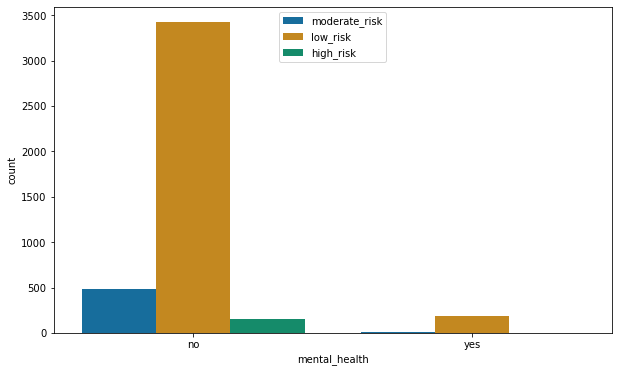

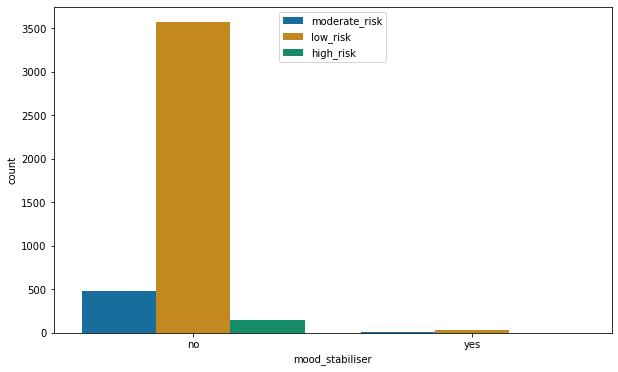

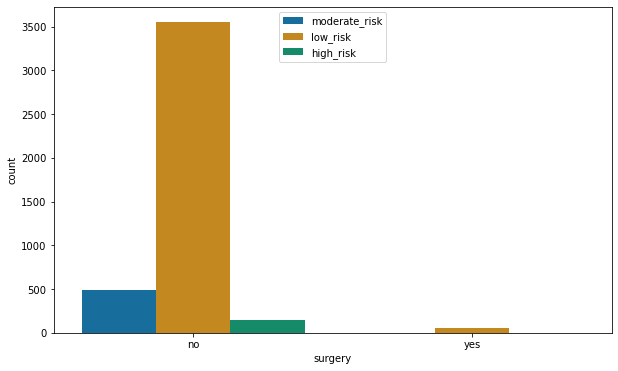

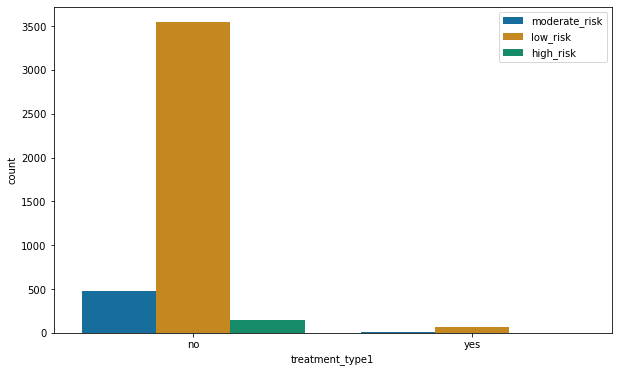

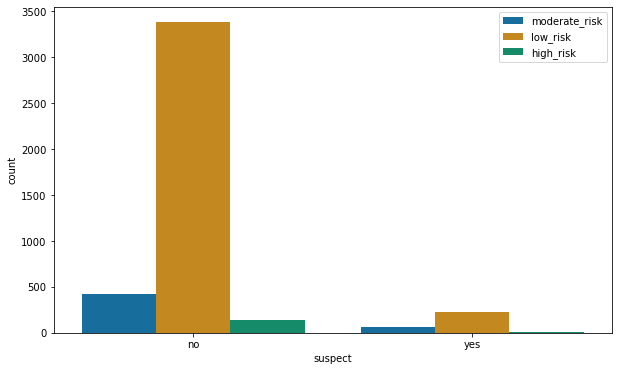

In [60]:
disease_bool_2 = disease_bool.copy()
disease_bool_2.remove('disorder')

answer_order = ['no','yes']

i=0
for var in disease_bool_2:
    plt.figure(figsize=(10, 6))
    test = disease_bool_2[i]
    i+=1
    sns.countplot(x=test, hue='target', palette='colorblind',order=answer_order, data=disease_train_agesremoved)
    
    plt.legend()  # Add legend to each subplot
    
    plt.show()  # Display the plot